# Project 6 - Boat & Yacht Sales

Importing Libraries
---

In [12]:
import pandas as pd
import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

Import our cleaned dataset
---

In [13]:
# create a path
path = r'C:\Users\niels\Documents\Sales Boat\Data Source'

In [14]:
# load data
df = pd.read_csv(os.path.join(path,'boat_data_cleaned_V2.csv'), index_col = False)

Split our dataset into a train and a test sub dataset in our to test our linear classifier on unseen data
---

In [15]:
df_train, df_test = train_test_split(df, train_size=0.8)

print(f"Length of our training data: {len(df_train)}")
print(f"Length of our test data: {len(df_test)}")

Length of our training data: 785
Length of our test data: 197


Predict the Width based on the Length (Really linear as we've seen previously that they are very correlated)
---

In [16]:
col_to_predict = "Width"
based_on_cols = ["Length",]

# Get the variables on which our linear model is going to try to predict the output variable
X_train, y_train = df_train[based_on_cols].values,  df_train[col_to_predict].values
X_test, y_test = df_test[based_on_cols].values,  df_test[col_to_predict].values

# Declare the model and fit it on our train data
model = LinearRegression(fit_intercept=True)
model = model.fit(X_train, y_train)

In [17]:
y_hat = model.predict(X_test)
print(f"The mean squared error on the predicted {col_to_predict} based on {', '.join(based_on_cols)} = {mean_squared_error(y_test, y_hat):.2e}")
print(f"The r2 score on the predicted {col_to_predict} based on {', '.join(based_on_cols)}           = {r2_score(y_test, y_hat):.2f}")

The mean squared error on the predicted Width based on Length = 2.86e-01
The r2 score on the predicted Width based on Length           = 0.79


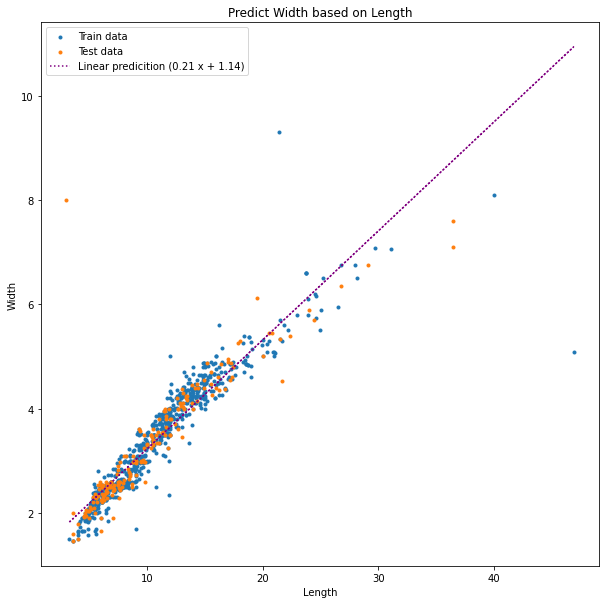

In [18]:
fig = plt.figure(figsize=(10, 10))
plt.xlabel("based_on_cols")
plt.title(f"Predict {col_to_predict} based on {', '.join(based_on_cols)}")
plt.xlabel(", ".join(based_on_cols))
plt.ylabel(col_to_predict)
plt.scatter(X_train[:, 0], y_train, marker=".", label="Train data")
plt.scatter(X_test[:, 0], y_test, marker=".", label="Test data")
plt.plot(X_train[:, 0], model.predict(X_train), c="purple", ls=":", label=f"Linear predicition ({model.coef_[0]:.2f} x + {model.intercept_:.2f})")
plt.legend()

Predict the Price based on the Length
---

In [19]:
col_to_predict = "EUR_price"
based_on_cols = ["Length"]

# Get the variables on which our linear model is going to try to predict the output variable
X_train, y_train = df_train[based_on_cols].values,  df_train[col_to_predict].values
X_test, y_test = df_test[based_on_cols].values,  df_test[col_to_predict].values

# Declare the model and fit it on our train data
model = LinearRegression(fit_intercept=True)
model = model.fit(X_train, y_train)

In [20]:
y_hat = model.predict(X_test)
print(f"The mean squared error on the predicted {col_to_predict} based on {', '.join(based_on_cols)} = {mean_squared_error(y_test, y_hat):.2e}")
print(f"The r2 score on the predicted {col_to_predict} based on {', '.join(based_on_cols)}           = {r2_score(y_test, y_hat):.2f}")

The mean squared error on the predicted EUR_price based on Length = 5.28e+11
The r2 score on the predicted EUR_price based on Length           = 0.45


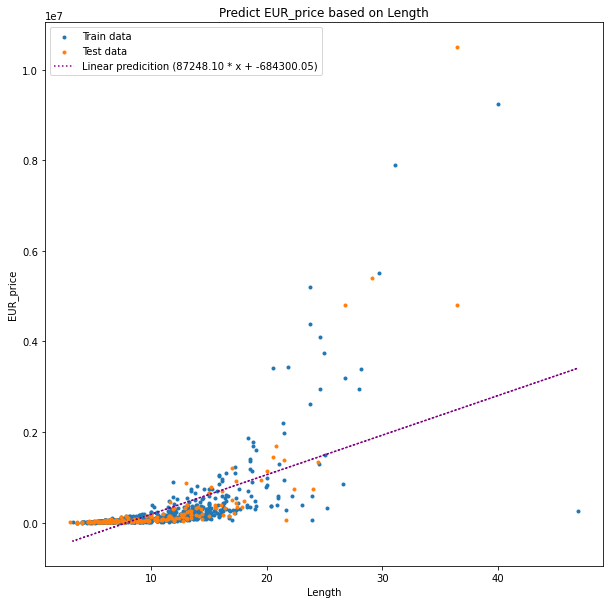

In [21]:
fig = plt.figure(figsize=(10, 10))
plt.xlabel("based_on_cols")
plt.title(f"Predict {col_to_predict} based on {', '.join(based_on_cols)}")
plt.xlabel(", ".join(based_on_cols))
plt.ylabel(col_to_predict)
plt.scatter(X_train[:, 0], y_train, marker=".", label="Train data")
plt.scatter(X_test[:, 0], y_test, marker=".", label="Test data")
plt.plot(X_train[:, 0], model.predict(X_train), c="purple", ls=":", label=f"Linear predicition ({model.coef_[0]:.2f} * x + {model.intercept_:.2f})")
plt.legend()

BONUS: remove outliers before applying the linear method
---

We are assuming that our data is normally distributed and we keep the 95% inner data points

In [22]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

col_to_predict = "EUR_price"
based_on_cols = ["Width"]

# Get the variables on which our linear model is going to try to predict the output variable
X_train, y_train = df_train[based_on_cols].values,  df_train[col_to_predict].values
X_test, y_test = df_test[based_on_cols].values,  df_test[col_to_predict].values

# Get the mean and std of our data in order to determine which points are outliers (Assuming that our data is normally distributed)
μ, σ = X_train.mean(), X_train.std()
cutoff = 1.96 * σ
mask_train = np.logical_and(μ - cutoff < X_train, X_train < μ + cutoff).reshape((-1, ))
mask_test = np.logical_and(μ - cutoff < X_test, X_test < μ + cutoff).reshape((-1, ))

X_train, y_train = X_train[mask_train], y_train[mask_train]
X_test, y_test = X_test[mask_test], y_test[mask_test]

print(f"Kept {mask_train.mean():.2f} % of the train data")
print(f"Kept {mask_test.mean():.2f} % of the test data")

Kept 0.97 % of the train data
Kept 0.96 % of the test data


In [23]:
# Declare the model and fit it on our train data
model = LinearRegression(fit_intercept=True)
model = model.fit(X_train, y_train)

In [24]:
y_hat = model.predict(X_test)
print(f"The mean squared error on the predicted {col_to_predict} based on {', '.join(based_on_cols)} = {mean_squared_error(y_test, y_hat):.2e}")
print(f"The r2 score on the predicted {col_to_predict} based on {', '.join(based_on_cols)}           = {r2_score(y_test, y_hat):.2f}")

The mean squared error on the predicted EUR_price based on Width = 3.47e+10
The r2 score on the predicted EUR_price based on Width           = 0.49


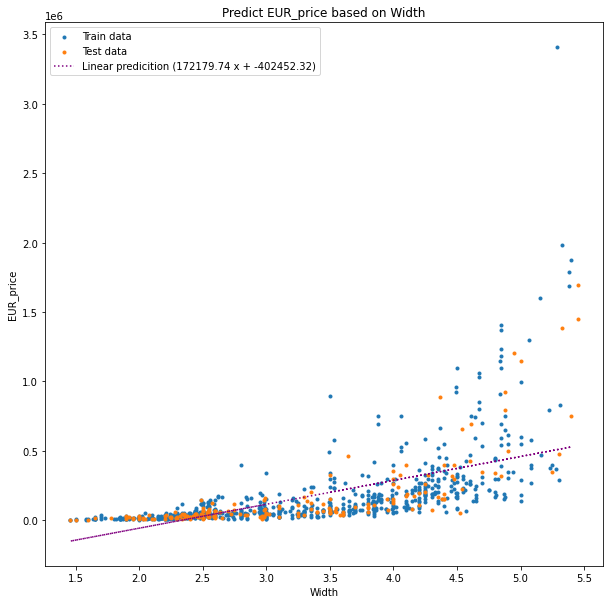

In [25]:
fig = plt.figure(figsize=(10, 10))
plt.title(f"Predict {col_to_predict} based on {', '.join(based_on_cols)}")
plt.xlabel(", ".join(based_on_cols))
plt.ylabel(col_to_predict)
plt.scatter(X_train[:, 0], y_train, marker=".", label="Train data")
plt.scatter(X_test[:, 0], y_test, marker=".", label="Test data")
plt.plot(X_train[:, 0], model.predict(X_train), c="purple", ls=":", label=f"Linear predicition ({model.coef_[0]:.2f} x + {model.intercept_:.2f})")
plt.legend()

Let's plot the difference of the output of the linear model and the actual values
---

We can definitely see the trend of our linear model and how it comes from underestimating and then overestimating the data

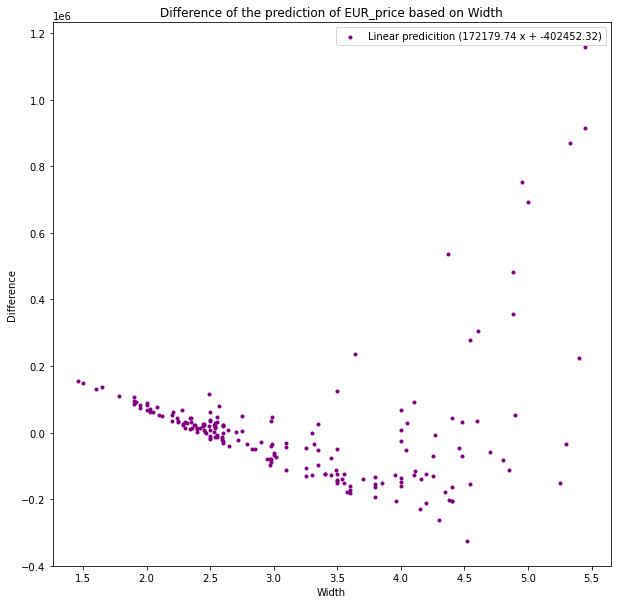

In [26]:
fig = plt.figure(figsize=(10, 10))
plt.title(f"Difference of the prediction of {col_to_predict} based on {', '.join(based_on_cols)}")
plt.xlabel(", ".join(based_on_cols))
plt.ylabel("Difference")
plt.scatter(X_test[:, 0], y_test - model.predict(X_test), c="purple", marker=".", label=f"Linear predicition ({model.coef_[0]:.2f} x + {model.intercept_:.2f})")
plt.legend()

We can see the differences in a dataframe as well
---

In [27]:
diff_df = pd.DataFrame(
    columns = ["True value", "Predicted value"],
    data= np.c_[y_test, model.predict(X_test)]
)
diff_df

,True value,Predicted value
0,51350.00,157131.842124
1,120000.00,40049.618055
2,3742.20,-126964.730984
3,62645.22,27997.036165
4,69201.00,45215.010293
...,...,...
184,325000.00,332755.178227
185,195000.00,320702.596337
186,149000.00,355138.544593
187,44900.00,26275.238753


Interepretation
---

Obviously, we have seen that the model learns really well on data linearly related like the length and the width of the boats but unfortunately, on data exponetially related, the model has really poor peformances.